# Strength of Concrete

In [1]:
#Standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the dataset
df = pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
df.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Going over the categories:
- cement: kg in a m3 mixture
- slag: kg in a m3 mixture
- flyash: kg in a m3 mixture
- water: kg in a m3 mixture
- superplasticizer: kg in a m3 mixture
- coarseaggregate: kg in a m3 mixture
- fineaggregate: kg in a m3 mixture
- age: in days
- csMPa: compressive strength in MPa

In [4]:
#Get shape of dataset
df.shape

(1030, 9)

In [5]:
#Describe type
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [6]:
#Describe features
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
#Check forr nulls:
df.isnull().values.any()

False

## Exploring the Data

In [8]:
#Create bins for concrete strength
cs_bin = np.arange(0, 120, 10)
print(cs_bin)

[  0  10  20  30  40  50  60  70  80  90 100 110]


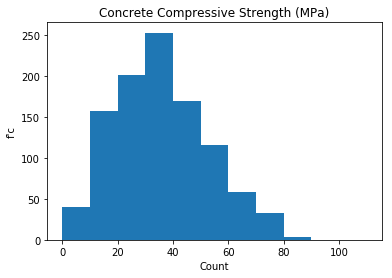

In [9]:
plt.hist(df['csMPa'], bins= cs_bin)
plt.xlabel('Count')
plt.ylabel("f'c")
plt.title('Concrete Compressive Strength (MPa)')
plt.show()

Distribution of concrete appears to be normal.

In [10]:
#Assume a Pearson correlation coefficient
pears= df.corr(method='pearson')
print(pears)

                    cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.275216 -0.397467 -0.081587          0.092386   
slag             -0.275216  1.000000 -0.323580  0.107252          0.043270   
flyash           -0.397467 -0.323580  1.000000 -0.256984          0.377503   
water            -0.081587  0.107252 -0.256984  1.000000         -0.657533   
superplasticizer  0.092386  0.043270  0.377503 -0.657533          1.000000   
coarseaggregate  -0.109349 -0.283999 -0.009961 -0.182294         -0.265999   
fineaggregate    -0.222718 -0.281603  0.079108 -0.450661          0.222691   
age               0.081946 -0.044246 -0.154371  0.277618         -0.192700   
csMPa             0.497832  0.134829 -0.105755 -0.289633          0.366079   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.081946  0.497832  
slag                    -0.283999      -0.281603 -0.044246  0.134829  
flyash

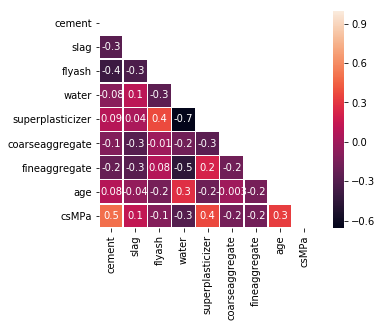

In [11]:
#Define mask for correlation plot
mask_corr = np.zeros_like(pears)
#Use lower half of square
mask_corr[np.triu_indices_from(mask_corr)] = True
#Plot correlation
sns.heatmap(pears, fmt = '1.0g', linewidths= 0.5, square= True, annot= True, mask= mask_corr)

Looking at the bottom row, compressive strength is positevely correlated with cement, superplasticizier content, and age. Water content has a negative effect on concrete strength.

## Cleaning the Data

The physical quantities given in the dataset are in units of mass. What really matters is the proportion of these materials in the total mixture.<br>
In addition, the American Concrete Institute (ACI) Building Code specifies quantities a portion of the total weight. In case this data is used for other purposes such as selecting concrete based on exposure class, it is better to represent the weights as fractions of the total weight. <br>
Assume that the features given account for the entire weight of the mixture. <br>
Assume water mass does not include curing or evaporation.



In [12]:
#Store column names in list
col_weights = df.columns.tolist()
#Drop the age
col_weights.remove('age')
#Drop the compressive strength
col_weights.remove('csMPa')
print(col_weights)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate']


In [13]:
#Create copy of dataframe
df_weights = df
#Drop age and weight
df_weights = df_weights.drop(columns = ['age', 'csMPa']);
df_weights.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


In [14]:
#Get the weight of each mixture
mixture_weights = df_weights.sum(axis = 1)

In [16]:
#Add the mixture weight to dataframe
df['mix_weight'] = mixture_weights

In [17]:
#Divide the weights
df_weights = df_weights.div(mixture_weights, axis ='index');
df_weights.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764


In [18]:
#Overwrite the existing values in original df
df.update(df_weights, overwrite=True);
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,mix_weight
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281,28,79.99,2420.5
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561,28,61.89,2435.5
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,270,40.27,2229.0
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,365,41.05,2229.0
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764,360,44.30,2326.9


In [19]:
#Describe dataset with proportions
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,mix_weight
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.119553,0.031643,0.023174,0.077727,0.002621,0.415165,0.330117,45.662136,35.817961,2343.523398
std,0.043101,0.036961,0.027462,0.010900,0.002495,0.031020,0.033244,63.169912,16.705742,65.365356
min,0.044815,0.000000,0.000000,0.051390,0.000000,0.345890,0.247971,1.000000,2.330000,2194.600000
25%,0.082058,0.000000,0.000000,0.069538,0.000000,0.392294,0.311208,7.000000,23.710000,2291.150000
50%,0.115282,0.009455,0.000000,0.078623,0.002727,0.420464,0.330542,28.000000,34.445000,2349.100000
75%,0.149170,0.061972,0.050335,0.083861,0.004351,0.437598,0.354096,56.000000,46.135000,2390.400000
max,0.225406,0.150339,0.088838,0.112222,0.013149,0.479846,0.414147,365.000000,82.600000,2551.000000


## Predicting Compressive Strength

In [20]:
#Store compressive strength in array
fc=df['csMPa']
#store features
features = df.drop('csMPa', axis= 1)

In [21]:
features.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,mix_weight
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281,28,2420.5
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561,28,2435.5
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,270,2229.0
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,365,2229.0
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764,360,2326.9


In [22]:
# Divide into train and test data
X_train = features.iloc[:900,]
X_test = features.iloc[900:,]
y_train = fc[:900,]
y_test = fc[900:,]

### MLP Regressor

In [23]:
#Import MLP regressor
from sklearn.neural_network import MLPRegressor
#Create the perceptron
clf = MLPRegressor(hidden_layer_sizes=(100,100),
                  max_iter=5000)
#fit the training set to the mlp
clf.fit(X_train, y_train);

In [24]:
#Store predictions in y_pred
y_pred = clf.predict(X_test)

In [25]:
#Fix type of y_test from dataframe to array
y_test = np.array(y_test)

In [26]:
#Store the difference in an array
fc_diff = []


#Store the percent difference in fc_diff
for i in range(len(y_pred)):
    fc_diff.append((y_pred[i] - y_test[i])/y_test[i])

In [27]:
#print mean error
fc_mean_error = np.mean(fc_diff)
print(fc_mean_error)

0.347212133691637


In [28]:
fc_std_error = np.std(fc_diff)
print(fc_std_error)

0.6950029823050068


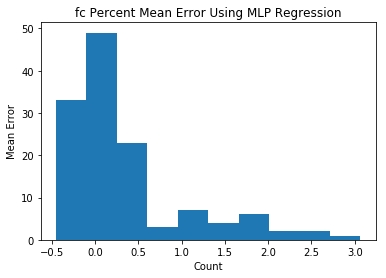

In [29]:
plt.hist(fc_diff)
plt.xlabel('Count')
plt.ylabel("Mean Error")
plt.title('fc Percent Mean Error Using MLP Regression')
plt.show()

### Random Forest Regressor

In [30]:
#Import package
from sklearn.ensemble import RandomForestRegressor
#Create regressor
clf_rfr = RandomForestRegressor(max_depth = 6, random_state = 42)
#Fit the data
clf_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
#Store the predictions in y_rfr
y_rfr= clf_rfr.predict(X_test)

In [32]:
#Store the difference in an array
fc_diff_rfr = []


#Store the percent difference in fc_diff_rfr
for i in range(len(y_pred)):
    fc_diff_rfr.append((y_rfr[i] - y_test[i])/y_test[i])

In [33]:
#print mean error
fc_mean_error_rfr = np.mean(fc_diff_rfr)
print(fc_mean_error_rfr)

0.18699475496664641


In [34]:
fc_std_error_rfr = np.std(fc_diff_rfr)
print(fc_std_error_rfr)

0.4301310649264631


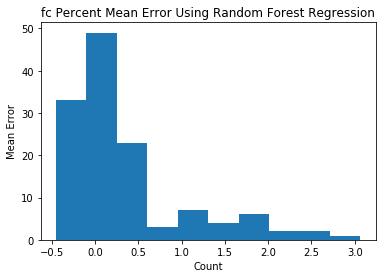

In [35]:
plt.hist(fc_diff)
plt.xlabel('Count')
plt.ylabel("Mean Error")
plt.title('fc Percent Mean Error Using Random Forest Regression')
plt.show()